In [25]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy.integrate import trapz
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import collections  as mc

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

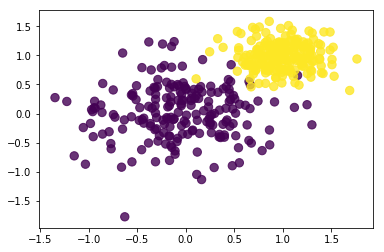

In [7]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

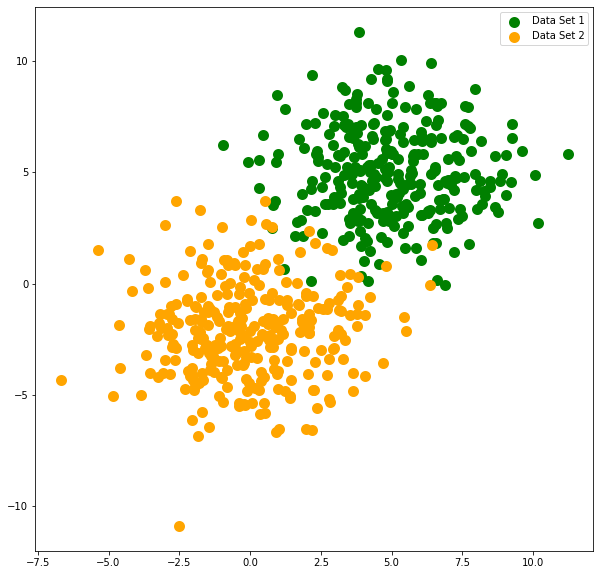

In [16]:
DataSet1 = np.random.multivariate_normal(size=300, mean=[5,5], cov=np.diag([5,5]))
DataSet2 = np.random.multivariate_normal(size=300, mean=[0,-2], cov=np.diag([5,5]))

plt.figure(figsize=[10,10])
plt.scatter(DataSet1[:,0],DataSet1[:,1], color='green', linewidths=5, label="Data Set 1")
plt.scatter(DataSet2[:,0],DataSet2[:,1], color='orange', linewidths=5, label="Data Set 2")
plt.legend(fontsize=10)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [20]:
df = pd.DataFrame(np.load("residuals_261.pkl",allow_pickle=True).item())
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [22]:
#  values of the variable "residual" smaller than 2

df = df[np.abs(df['residuals'])<2]
df.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


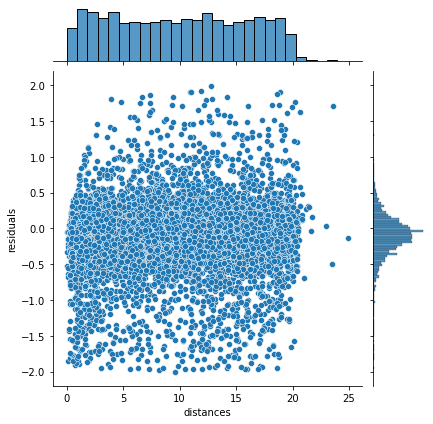

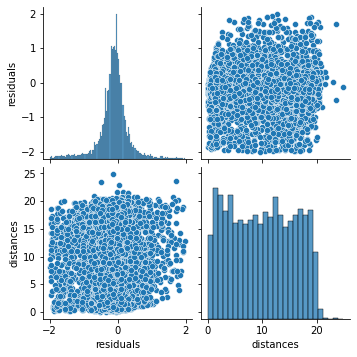

In [28]:

sns.jointplot(x="distances", y="residuals", data=df)

sns.pairplot(df)           


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [30]:
sample_mean = 5.0
sample_std = 0.1
sample_size = 10000
samples = np.random.normal(sample_mean, sample_std, sample_size)

Text(0.5, 0, 'Sample Value')

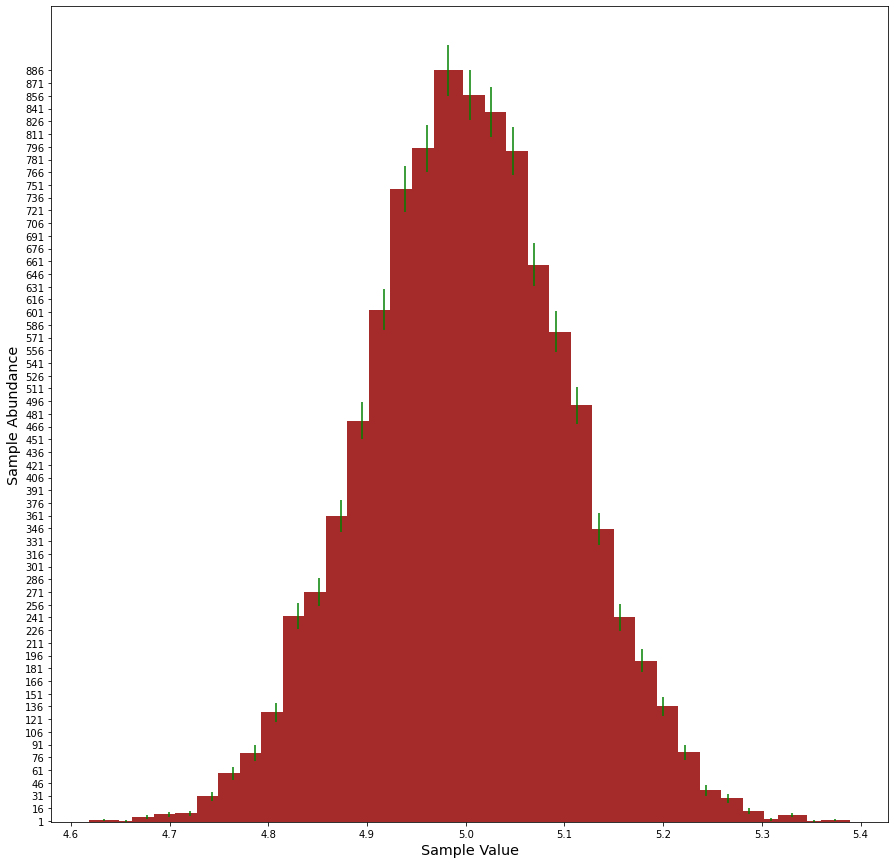

In [44]:
plt.figure(figsize=(15,15))
sample_abd,edges = np.histogram(samples, bins=35)
yRange = [int(sample_abd.min()), int(sample_abd.max())]
yRange = list(range(yRange[0], yRange[1]+15,15))
plt.bar(0.5*(edges[:-1] + edges[1:]), sample_abd, width=0.03, yerr=np.sqrt(sample_abd),color='brown', ecolor='green')
plt.ylabel("Sample Abundance", fontsize='x-large')
plt.yticks(yRange);
plt.xlabel('Sample Value', fontsize='x-large')